# Topic 1 Overview of Machine Learning and Scikit Learn

## 43 Checking your installation

In [ ]:
import sklearn

# Topic 2 Classification

## 049 KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

## 051 Logisitic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

## 055 SVM Classifier

In [ ]:
from sklearn.svm import SVC

clf = SVC()

## 059 GNB Classifier

In [ ]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

sexes = pd.DataFrame({
  'Person': ['male'] * 4 + ['female'] * 4,
  'height': [6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75],
  'weight': [180, 190, 170, 165, 100, 150, 130, 150],
  'foot size': [12, 11, 12, 10, 6, 8, 7, 9]
})

display(sexes)

y = sexes.pop('Person')

model = clf.fit(sexes, y)
print(model.theta_)
print(model.sigma_) #population variance
print(model.classes_)
example = pd.DataFrame({
  'height': [6],
  'weight': [130],
  'foot size': [8]
})
print(model.predict_proba(example)) #consider this as odds
print(model.predict(example)) #in practice you do this directly

,Person,height,weight,foot size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


[[  5.4175 132.5      7.5   ]
 [  5.855  176.25    11.25  ]]
[[7.29194840e-02 4.18750001e+02 1.25000073e+00]
 [2.62757340e-02 9.21875007e+01 6.87500734e-01]]
['female' 'male']
[[9.99999846e-01 1.54426632e-07]]
['female']


## 061 SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()

## 063 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

## 066 Step 1 Prepare the Data

In [ ]:
import pandas as pd

dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv'

X = pd.read_csv(dataset_path)

# Drop any missing data
X = X.dropna()

display(X)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 067 Extract Features and Target

In [ ]:
y = X.pop('species')

# Encode the Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

display(y)
y = le.fit_transform(y)
display(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 068 Normalize/Scale the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

display(X_scaled)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


## 069 Split and Randomize Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=33)

## 070 Step 2 Define the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5) #n_neighbors is option

## 071 Step 3 Train the Model

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 072 Step 4 Evaluate the Model

In [ ]:
clf.score(X_test, y_test) #always score on the test set

0.9473684210526315

## 073 Step 5 Save the Model

In [ ]:
import joblib

joblib.dump(clf, 'mymodel.pkl')
joblib.dump(le, 'le.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## 074 Step 6 Load the Model for Inference

In [ ]:
import joblib

clf2 = joblib.load('mymodel.pkl')
scaler2 = joblib.load('scaler.pkl')
le2 = joblib.load('le.pkl')

import numpy as np

X_new = np.array([[6.7, 3.1, 4.7, 1.5]])

X_new = scaler2.transform(X_new)

y = le2.inverse_transform(clf2.predict(X_new))

print(f'The flower is {y[0]}')

The flower is versicolor


## 075 Ex: Classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1

dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv'
X = pd.read_csv(dataset_path).dropna() #import as pandas DataFrame and clean
le = LabelEncoder()
y = le.fit_transform(X.pop('species')) #remove species column from X and assign to y
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=33)

#Step 2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clf = {
  'KNN': KNeighborsClassifier(n_neighbors=5),
  'LogReg': LogisticRegression(),
  'SVM': SVC(),
  'GNB': GaussianNB(),
  'SGD': SGDClassifier(),
  'DT': DecisionTreeClassifier()
}

#Step 3
clf = {key: model.fit(X_train, y_train) for key, model in clf.items()}

#Step 4
scores = {key: model.score(X_test, y_test) for key, model in clf.items()}

for key, score in scores.items():
  print(f'{key}: {score}')

KNN: 0.9473684210526315
LogReg: 0.868421052631579
SVM: 0.9473684210526315
GNB: 0.9473684210526315
SGD: 0.631578947368421
DT: 0.8947368421052632


## 079 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

## 081 Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

## 083 Stacking Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [] #fill up with models
clf = VotingClassifier(estimators, voting='hard')

## 084 Ex: Ensemble Methods

In [ ]:
#Step 1
dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-red.csv'

X = pd.read_csv(dataset_path, sep=';').dropna()

le = LabelEncoder()
y = le.fit_transform(X.pop('quality')) #remove species column from X and assign to y
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=33)

#Step 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

base = [
  ('lr', LogisticRegression()),
  ('rf', RandomForestClassifier()),
  ('gnb', GaussianNB())
]

clf = {
  'DT': DecisionTreeClassifier(),
  'RF': RandomForestClassifier(),
  'GBoost': GradientBoostingClassifier(),
  'Stack': VotingClassifier(base, voting='hard')
}

#Step 3
clf = {key: model.fit(X_train, y_train) for key, model in clf.items()}

#Step 4
scores = {key: model.score(X_test, y_test) for key, model in clf.items()}

for key, score in scores.items():
  print(f'{key}: {score}')

DT: 0.57
RF: 0.6475
GBoost: 0.6225
Stack: 0.6125


## 086 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = clf['RF'].predict(X_test)
display(confusion_matrix(y_test, y_pred))

array([[  0,   0,   1,   0,   0,   0],
       [  1,   0,   6,   7,   0,   0],
       [  0,   0, 131,  44,   1,   0],
       [  0,   0,  42, 102,   6,   1],
       [  0,   0,   2,  24,  26,   0],
       [  0,   0,   0,   5,   1,   0]])

## 087 Ex: Confusion Matrix

In [ ]:
#Step 1
dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-red.csv'

X = pd.read_csv(dataset_path, sep=';').dropna()

le = LabelEncoder()
y = le.fit_transform(X.pop('quality')) #remove species column from X and assign to y
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=33)

#Step 2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

#Step 3
clf = {key: model.fit(X_train, y_train) for key, model in clf.items()}
y_pred = {key: model.predict(X_test) for key, model in clf.items()}

#Step 4
from sklearn.metrics import confusion_matrix
matrix = {key: confusion_matrix(y_test, value) for key, value in y_pred.items()}
for key, value in matrix.items():
  print(f'{key}:\n{value}')

a = matrix['SVM']

KNN:
[[  0   1   0   0   0   0]
 [  0   0   3  11   0   0]
 [  0   4 113  58   1   0]
 [  0   1  50  82  18   0]
 [  0   0   5  29  18   0]
 [  0   0   0   3   3   0]]
SVM:
[[  0   0   1   0   0   0]
 [  0   0   8   6   0   0]
 [  0   0 131  44   1   0]
 [  0   0  54  90   7   0]
 [  0   0   2  41   9   0]
 [  0   0   0   5   1   0]]


## 096 Individual Metrics for Binary Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
X = pd.read_csv(dataset_path)[50:] # drop first 50 rows to remove all setosa examples
X = X.dropna()
y = X.pop('species')
# Encode the Labels
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X, y)

y_pred = clf.predict(X)
print(f'Accuracy = {accuracy_score(y, y_pred)}')
#the following only works with binary classification
print(f'Precision = {precision_score(y, y_pred)}')
print(f'Recall = {recall_score(y, y_pred)}')
print(f'F1 Score = {f1_score(y, y_pred)}')

Accuracy = 0.95
Precision = 0.9411764705882353
Recall = 0.96
F1 Score = 0.9504950495049505


## 097 Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## 102 ROC and AUC

AUC = 0.9952000000000001


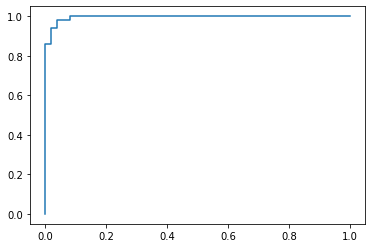

[0.   0.   0.   0.   0.   0.02 0.02 0.04 0.04 0.08 0.08 1.  ] [0.   0.02 0.74 0.78 0.86 0.86 0.94 0.94 0.98 0.98 1.   1.  ]
[1.99906959e+00 9.99069585e-01 8.21361632e-01 8.07659536e-01
 7.31008441e-01 6.52687677e-01 5.54659072e-01 5.37285790e-01
 5.20258090e-01 4.47035575e-01 4.13541729e-01 1.88003893e-03]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
X = pd.read_csv(dataset_path)[50:] # drop first 50 rows to remove all setosa examples
X = X.dropna()
y = X.pop('species')
# Encode the Labels
le = LabelEncoder()
y = le.fit_transform(y)

clf = LogisticRegression()
clf.fit(X, y)

#predict probabilities
y_probs = clf.predict_proba(X)[:, 1] #retain 2nd column only

auc_score = roc_auc_score(y, y_probs)
print(f'AUC = {auc_score}')
fpr, tpr, threshold = roc_curve(y, y_probs)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr) #plot ROC curve
plt.show()
print(fpr, tpr)
print(threshold)

# Topic 3 Regression

## 113 Import the Data

In [ ]:
import pandas as pd

dataset_path = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

X = pd.read_csv(dataset_path)
display(X)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 114 Prepare the Data for Training

In [ ]:
#Remove missing data
X = X.dropna()

#Create input and output

y = X.pop('medv')

## 115 Normalize/Scale the Input Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#scaler.fit(X).transform(X)
#scaler.fit_transform(X)

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## 116 Split the Input Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)

## 117 Define the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

## 118 Train the Model

In [ ]:
lm.fit(X_train, y_train) #y is included only for supervised algorithms

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#120 Model Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = lm.predict(X_train)
mse = mean_squared_error(y_train, yhat)
print(f'Mean Squared Error, Training: {mse}')
rsq = r2_score(y_train, yhat)
print(f'R-square, Training: {rsq}')

yhat = lm.predict(X_test)
mse = mean_squared_error(y_test, yhat)
print(f'Mean Squared Error, Training: {mse}')
rsq = r2_score(y_test, yhat)
print(f'R-square, Test: {rsq}')

print('Raw calculation:', 1 - np.power(y_test - yhat, 2).sum()/np.power(y_test - y_test.mean(), 2).sum())

Mean Squared Error, Training: 19.067391155385046
R-square, Training: 0.752890983596846
Mean Squared Error, Training: 29.798844301478802
R-square, Test: 0.7057919873264542
Raw calculation: 0.7057919873264542


## 121 Evaluate the Model

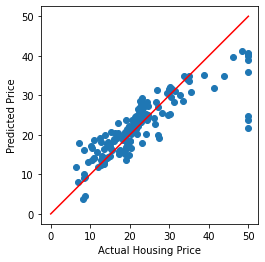

In [ ]:
import matplotlib.pyplot as plt

yhat = lm.predict(X_test)
plt.scatter(y_test, yhat)
plt.xlabel('Actual Housing Price')
plt.ylabel('Predicted Price')

plt.plot([0, 50], [0, 50], 'r')
plt.axis('square')
plt.show()

Mean Squared Error, Training: 0.08104218238470283
R-square, Training: 0.5329231127001638
Mean Squared Error, Test: 0.10980387289057192
R-square, Test: 0.4954095161725409


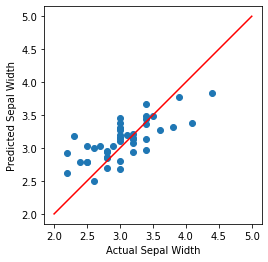

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#point 1
dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv'

X = pd.read_csv(dataset_path) #import as pandas DataFrame
#drop any missing data
X = X.dropna() #returns new DataFrame
X.pop('species') #throw away this column
y = X.pop('sepal_width')


scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)

#point 2
lm = LinearRegression()

#point 3
lm.fit(X_train, y_train)

#point 4
yhat = lm.predict(X_train)
mse = mean_squared_error(y_train, yhat)
print(f'Mean Squared Error, Training: {mse}')
rsq = r2_score(y_train, yhat)
print(f'R-square, Training: {rsq}')

yhat = lm.predict(X_test)
mse = mean_squared_error(y_test, yhat)
print(f'Mean Squared Error, Test: {mse}')
rsq = r2_score(y_test, yhat)
print(f'R-square, Test: {rsq}')

yhat = lm.predict(X_test)
plt.scatter(y_test, yhat)
plt.xlabel('Actual Sepal Width')
plt.ylabel('Predicted Sepal Width')

plt.plot([2, 5], [2, 5], 'r') #r for red line
plt.axis('square') #based on what's plotted right before this
plt.show()

## 126 Regularizations in Scikit-Learn

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

rr = Ridge(alpha=0.01)
lr = Lasso(alpha=0.01)
er = ElasticNet(alpha=0.01, l1_ratio=0.5)

#these are supervised, due to the need to provide the outcome
print(rr.fit(X_train, y_train))
print(lr.fit(X_train, y_train))
print(er.fit(X_train, y_train))

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


# Topic 4 Clustering

## 136 How to Choose K

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for i in range(2, 10):
  cluster = KMeans(n_clusters=i, random_state=10)
  cluster.fit(X)
  s = silhouette_score(X, cluster.labels_)
  print(f'Cluster: {i}, Silhouette Score: {s}')

Cluster: 2, Silhouette Score: 0.7019459463656291
Cluster: 3, Silhouette Score: 0.5847390326324567
Cluster: 4, Silhouette Score: 0.5430491589976363
Cluster: 5, Silhouette Score: 0.5463337347833246
Cluster: 6, Silhouette Score: 0.5363674900325149
Cluster: 7, Silhouette Score: 0.3919694090435893
Cluster: 8, Silhouette Score: 0.3857227051281268
Cluster: 9, Silhouette Score: 0.3894293833828106


## 137 K-Means Clustering Steps

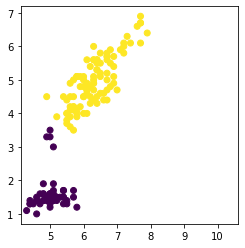

In [ ]:
# Step 1 Model
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2)

# Step 2 Training
cluster.fit(X)

# Step 3 Evaluation
# no .transform(), no .predict(), use .labels_ directly
plt.scatter(X.loc[:, X.columns[0]], X.loc[:, X.columns[1]], c=cluster.labels_)
plt.axis('square')
plt.show()

## 138 Clustering Output

In [ ]:
print(cluster.cluster_centers_)
print(cluster.labels_)

[[5.00555556 1.59814815 0.30185185]
 [6.31458333 4.97395833 1.703125  ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


## 139 K-Means Clustering Demo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


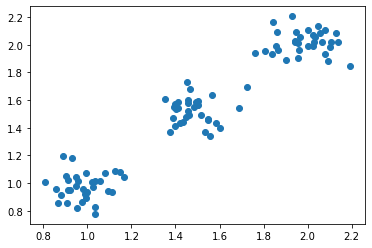

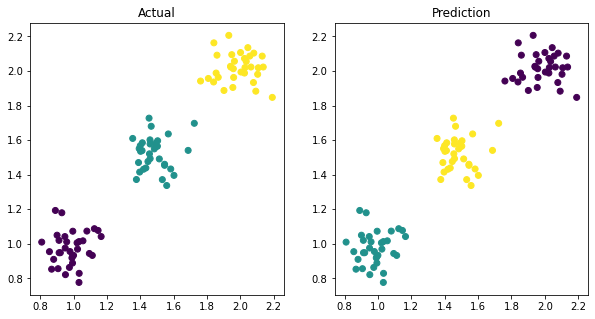

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [1.5, 1.5], [2, 2]] #centroids
X, y = make_blobs(n_samples=100, centers = centers, cluster_std=0.1)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()

from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3,random_state=10)

cluster.fit(X) #unsupervised: there's no y

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)
plt.title("Prediction")
plt.show()

## 140 Ex: K-Means Cluster

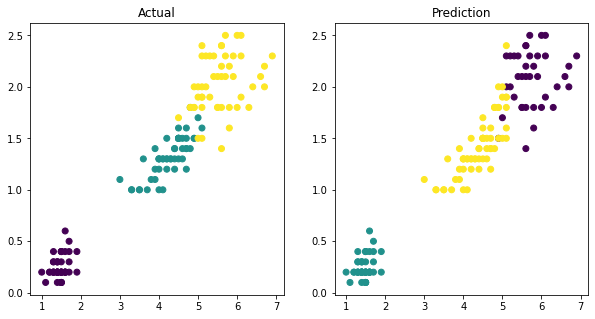

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

# Step 1
dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv'

X = pd.read_csv(dataset_path)
le = LabelEncoder()
X['species'] = le.fit_transform(X['species'])

#Step 2
cluster = KMeans(n_clusters=3) #hyperparameter k=3
cluster.fit(X[X.columns[:4]]) #unsupervised
X['cluster'] = cluster.labels_

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X['petal_length'], X['petal_width'], c=X['species']) #color according to actual
plt.title("Actual")
plt.subplot(1, 2, 2)
plt.scatter(X['petal_length'], X['petal_width'], c=X['cluster']) #color according to cluster
plt.title("Prediction")
plt.show()

## 143 Dendrogram

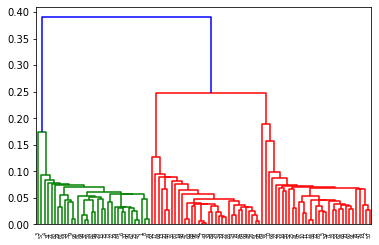

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [1.5, 1.5], [2, 2]] #centroids
X, y = make_blobs(n_samples=100, centers = centers, cluster_std=0.1)

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)
d = dendrogram(Z)
plt.show()

## 145 Hierarchical Clustering

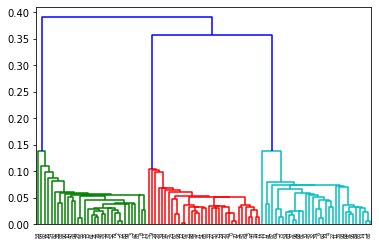

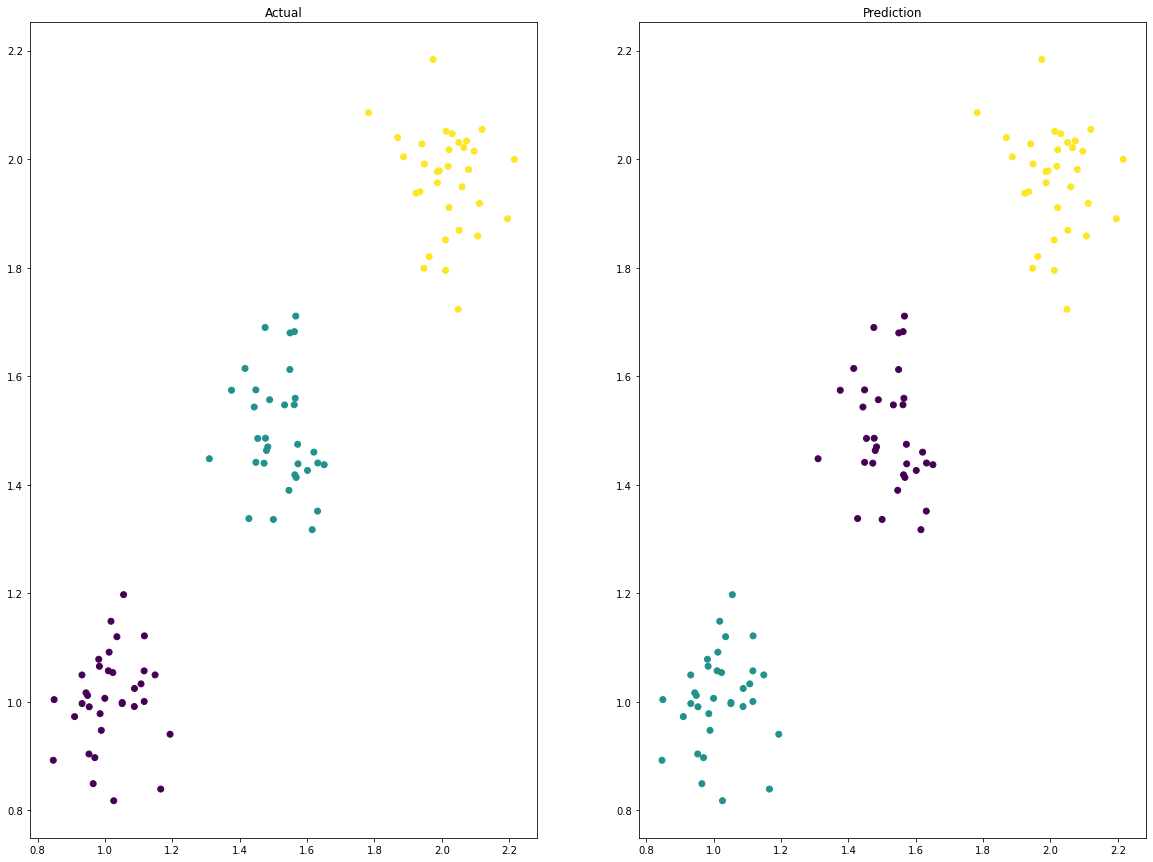

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [1.5, 1.5], [2, 2]]
X, y = make_blobs(n_samples=100,centers = centers,cluster_std=0.1)

from sklearn.cluster import AgglomerativeClustering

Z = linkage(X)
d = dendrogram(Z)
plt.show()

cluster = AgglomerativeClustering(n_clusters=3) #cut into 3 groups
cluster.fit(X)

#X is a matrix
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.scatter(X[:, 0], X[:, 1], c=y)
ax1.set_title('Actual')
ax2.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
ax2.set_title('Prediction')
plt.show()

## 146 Ex: Hierarchical Clustering

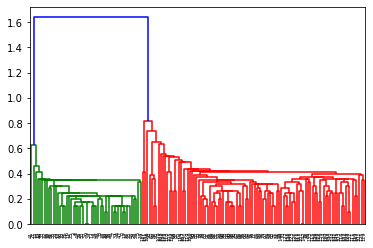

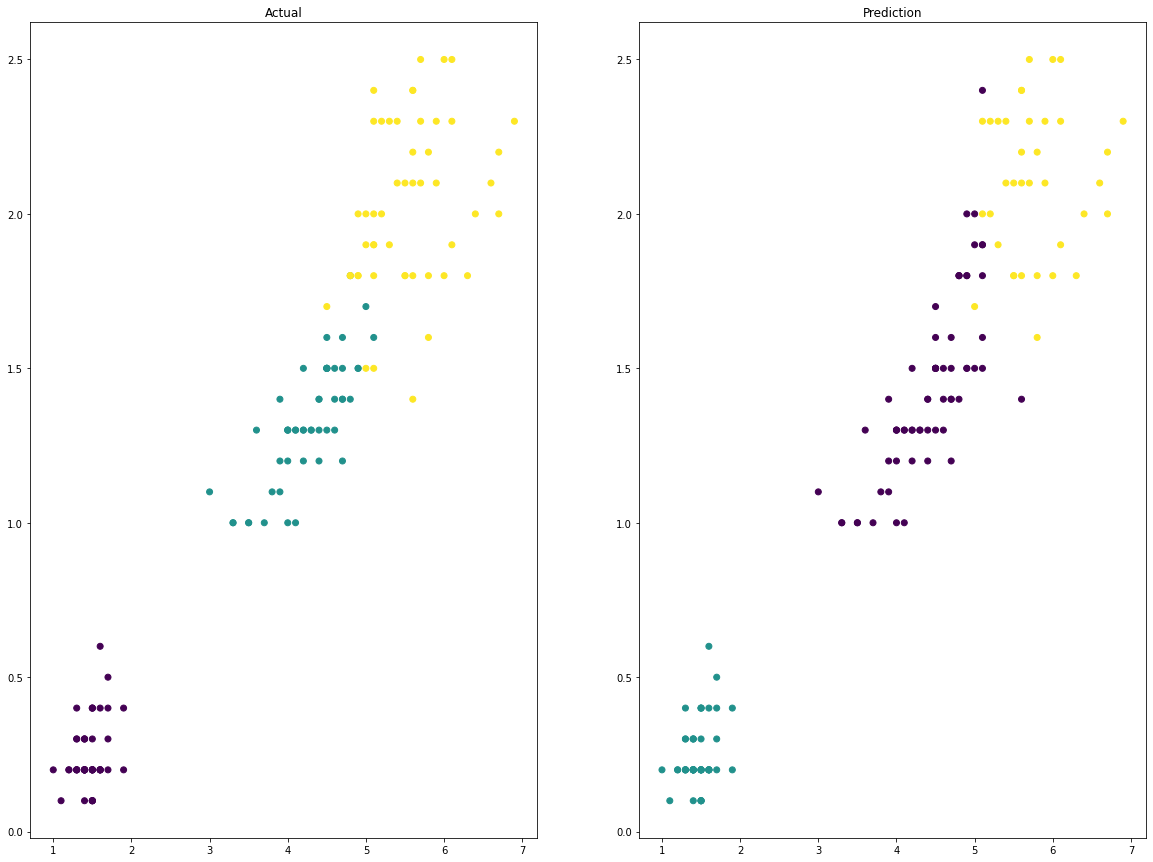

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv'
X = pd.read_csv(dataset_path).dropna() #import as pandas DataFrame and clean
le = LabelEncoder()
y = le.fit_transform(X.pop('species'))

Z = linkage(X)
d = dendrogram(Z)
plt.show()

cluster = AgglomerativeClustering(n_clusters=3) #cut into 3 groups
cluster.fit(X)
#X is a Pandas DataFrame
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y)
ax1.set_title('Actual')
ax2.scatter(X.iloc[:, 2], X.iloc[:, 3], c=cluster.labels_)
ax2.set_title('Prediction')
plt.show()

# Topic 5 Dimension Reduction

## 156 PCA Simple Demo

2


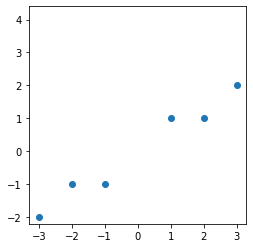

In [ ]:
import numpy as np

X = np.array([
  [-1, -1], [-2, -1], [-3, -2],
  [1, 1], [2, 1], [3, 2]
])

print(len(X.shape)) #count dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.axis('square')
plt.show()

## 157 Principal Component Analysis

In [ ]:
X_t = pca.fit_transform(X)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[7.93954312 0.06045688]
[0.99244289 0.00755711]


In [ ]:
import numpy as np


print(np.linalg.det(pca.components_))

print(np.dot(pca.components_[0,:], pca.components_[0,:]))

print(np.dot(pca.components_[1,:], pca.components_[1,:]))

print('Rotation matrix rotates by the following degrees:')
print(np.arctan2(pca.components_[0,0], pca.components_[0,1])/np.pi*180)

1.0
1.0
1.0
Rotation matrix rotates by the following degrees:
-123.01875551271091


[2.93035378 0.92740362 0.14834223 0.02074601]
[0.72770452 0.23030523 0.03683832 0.00515193]


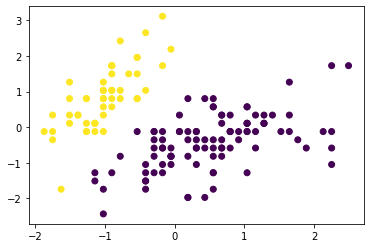

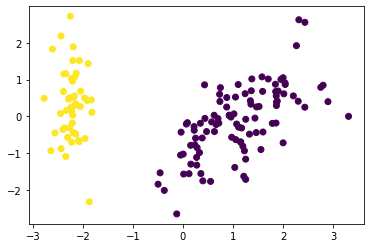

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset_path = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv'
X = pd.read_csv(dataset_path).dropna() #import as pandas DataFrame and clean
y = X.pop('species') 

scaler = StandardScaler()
X = scaler.fit_transform(X) #retain as matrix

pca = PCA(n_components=4)
X_t = pca.fit_transform(X)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

km1 = KMeans(n_clusters=2)
km2 = KMeans(n_clusters=2)

y1 = km1.fit(X).predict(X)
y2 = km2.fit(X_t).predict(X_t)

plt.scatter(X[:, 0], X[:, 1], c=y1)
plt.show()

plt.scatter(X_t[:, 0], X_t[:, 1], c=y2)
plt.show()